# Name: Rushikesh Jyoti
# Divison: A
# Roll no: 27
# SRN: 201901139

## Question
- Read the dataset "protein.csv" that is provided to you. 
- Build a suitable clustering model using R/Python based on k-means clustering approach. 
- Plot the clusters and show how the model varies with different values of k.  
- Develop some metrics to determine the accuracy of your clustering model


In [2]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plot
import random

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./protein.csv")[['Country', 'RedMeat', 'WhiteMeat']]

df.head()

,Country,RedMeat,WhiteMeat
0,Albania,10.1,1.4
1,Austria,8.9,14.0
2,Belgium,13.5,9.3
3,Bulgaria,7.8,6.0
4,Czechoslovakia,9.7,11.4


# Dataset Splitting

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(["Country"], axis=1), df["Country"], train_size=0.8)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(20, 2) (5, 2) (20,) (5,)


# Clustering Model (k=3)

In [5]:
model = KMeans(3)
model.fit(df.drop(["Country"], axis=1), df["Country"])

model

KMeans(n_clusters=3)

In [37]:
predictions = model.predict(xtest)
print(predictions.shape)
print(xtrain.shape)
print(model.labels_.shape)

metrics.silhouette_score(df.drop(['Country'], axis=1), model.labels_)

(5,)
(20, 2)
(25,)


0.4077379478809011

In [6]:
colors = list(sb.colors.crayons.values())
colors = random.sample(colors, k=model.cluster_centers_.shape[0])
colors

['#FF1DCE', '#6DAE81', '#F78FA7']

## Plotting the scatter plot

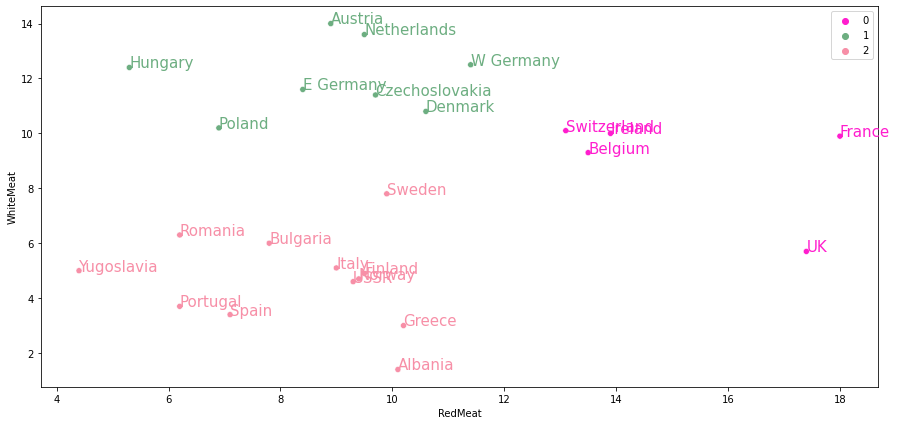

In [7]:
plot.figure(1, (15, 7))
sb.scatterplot(x='RedMeat', y='WhiteMeat', hue=model.labels_, data=df, legend="full", palette=colors)

for i in range(df.shape[0]):
    plot.text(x=df['RedMeat'][i], y=df['WhiteMeat'][i], s=df['Country'][i], fontdict={'size': 15, 
    'color': colors[model.predict(
        df.drop(['Country'], axis=1))[i]
    ]})
    pass

plot.show()

# Clustering Model (k=7)

In [8]:
model = KMeans(7)
model.fit(df.drop(["Country"], axis=1), df["Country"])

model

KMeans(n_clusters=7)

In [9]:
colors = list(sb.colors.crayons.values())
colors = random.sample(colors, k=model.cluster_centers_.shape[0])
colors

['#EF98AA', '#D68A59', '#EFCDB8', '#EFDECD', '#6DAE81', '#DD4492', '#FC6C85']

## Plotting

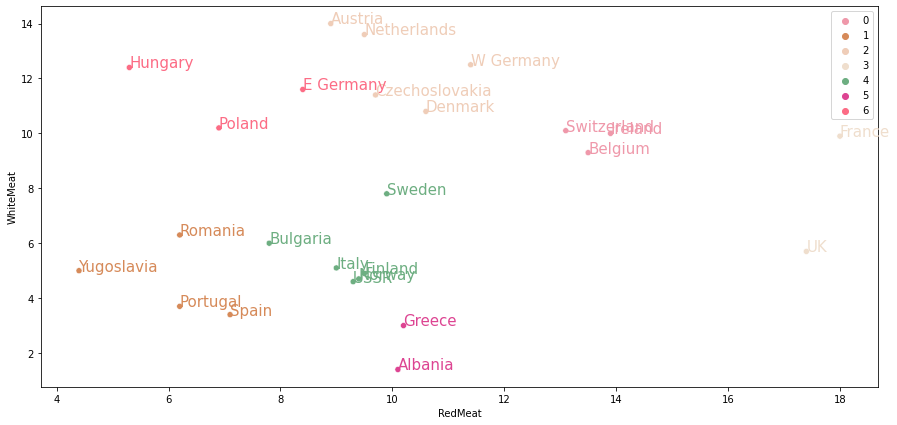

In [10]:
plot.figure(1, (15, 7))
sb.scatterplot(x='RedMeat', y='WhiteMeat', hue=model.labels_, data=df, legend="full", palette=colors)

for i in range(df.shape[0]):
    plot.text(x=df['RedMeat'][i], y=df['WhiteMeat'][i], s=df['Country'][i], fontdict={'size': 15, 
    'color': colors[model.predict(
        df.drop(['Country'], axis=1))[i]
    ]})

plot.show()

In [11]:
import numpy as np

In [12]:
predictions = model.predict(xtest)
print(predictions.shape)
print(xtrain.shape)
print(model.labels_.shape)

metrics.silhouette_score(df.drop(['Country'], axis=1), model.labels_)

(5,)
(20, 2)
(25,)


0.4077379478809011